<a href="https://colab.research.google.com/github/ChacoGolden/DSML_EV/blob/main/DSML_EV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install geopandas matplotlib requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import requests


In [3]:
cars_number = pd.read_csv('https://raw.githubusercontent.com/ChacoGolden/DSML_EV/refs/heads/main/new_passenger_car.csv')
EV_share = pd.read_csv('https://raw.githubusercontent.com/ChacoGolden/DSML_EV/refs/heads/main/share_EV.csv')

In [6]:
cars_number.tail()


,date,ZH,BE,LU,UR,SZ,OW,NW,GL,ZG,...,SG,GR,AG,TG,TI,VD,VS,NE,GE,JU
5,20190101,53105,27701,12994,1084,5893,1149,1360,1514,6249,...,15907,6623,24603,8471,18380,32726,10924,6445,14073,2797
6,20200101,40160,21688,10089,854,4569,819,1048,1160,5102,...,11635,5012,18694,6269,14424,24705,8574,4587,11171,2166
7,20210101,40799,21954,10543,903,4723,887,1134,1091,5623,...,11989,5089,18955,6715,14445,25416,9247,4998,11339,2264
8,20220101,38655,21662,9841,819,4773,806,1167,1024,5785,...,11767,4769,18042,6811,14031,23775,9088,4767,10764,2111
9,20230101,43246,23278,11212,966,5310,982,1321,1119,6114,...,12814,5314,20389,6973,15857,25642,9617,5159,10652,2393


In [7]:
EV_share.head()

,date,ZH,BE,LU,UR,SZ,OW,NW,GL,ZG,...,SG,GR,AG,TG,TI,VD,VS,NE,GE,JU
0,20140101,0.93,0.91,0.66,0.65,0.87,0.75,1.04,1.02,0.55,...,0.62,1.48,0.45,0.66,0.87,0.84,0.78,0.31,1.03,1.04
1,20150101,3.49,1.49,1.70,0.80,2.30,1.25,1.61,1.18,2.88,...,1.53,1.74,2.14,1.45,1.53,1.07,1.16,0.76,1.73,0.96
2,20160101,3.16,2.16,1.83,0.83,2.14,2.18,1.64,1.07,2.72,...,1.75,2.39,2.09,1.80,1.69,1.39,1.38,1.09,2.12,1.14
3,20170101,4.24,2.56,2.11,1.53,2.86,3.30,1.99,1.29,3.42,...,2.68,2.60,2.92,2.28,1.83,2.36,2.43,1.40,3.02,1.95
4,20180101,4.55,3.15,2.72,1.57,4.15,5.15,2.41,2.02,4.33,...,3.38,3.16,3.26,3.64,2.37,2.52,2.24,1.60,3.58,2.16


In [9]:
# Convert the 'date' column to string and keep only the first 4 digits (the year)
cars_number['date'] = cars_number['date'].astype(str).str[:4]
EV_share['date'] = EV_share['date'].astype(str).str[:4]

# (Optional) Check the result
print(cars_number.head())
print(EV_share.head())


   date     ZH     BE     LU    UR    SZ    OW    NW    GL    ZG  ...     SG  \
0  2014  52120  27720  13003   974  5720  1378  1549  1806  5527  ...  14978   
1  2015  55912  29718  14260  1122  6254  1355  1736  1868  6206  ...  15892   
2  2016  53449  28454  13629  1089  6085  1192  1529  1683  6108  ...  15617   
3  2017  54211  28172  14266  1114  5884  1211  1506  1631  6161  ...  14951   
4  2018  51600  26966  12596  1020  5609  1126  1330  1387  5979  ...  14428   

     GR     AG    TG     TI     VD     VS    NE     GE    JU  
0  6563  23834  8186  18676  31906  10525  6951  14448  3046  
1  6850  25290  9013  20291  34535  11850  7149  16020  3447  
2  6899  25028  9053  19864  31841  11359  6818  15410  2885  
3  6611  24526  8239  19028  33026  11045  6704  15020  2822  
4  6329  23440  7797  17714  30775  10199  6189  13865  2784  

[5 rows x 27 columns]
   date    ZH    BE    LU    UR    SZ    OW    NW    GL    ZG  ...    SG  \
0  2014  0.93  0.91  0.66  0.65  0.87  0.7

In [10]:
# Get unique years in each DataFrame
years_cars = set(cars_number['date'].unique())
years_ev = set(EV_share['date'].unique())

# Check if they match exactly
if years_cars == years_ev:
    print("The years match exactly in both datasets.")
else:
    print("The years do NOT match!")
    print("Years only in cars_number:", years_cars - years_ev)
    print("Years only in EV_share:", years_ev - years_cars)

# Also check if the number of rows (years) is the same
print(f"Number of years in cars_number: {len(cars_number['date'].unique())}")
print(f"Number of years in EV_share: {len(EV_share['date'].unique())}")


The years match exactly in both datasets.
Number of years in cars_number: 10
Number of years in EV_share: 10


In [11]:
# Get list of canton columns (excluding 'date') from both DataFrames
cantons_cars = list(cars_number.columns[1:])
cantons_ev = list(EV_share.columns[1:])

# Check if the canton columns match and are in the same order
if cantons_cars == cantons_ev:
    print("The canton columns match and are in the same order in both datasets.")
else:
    print("The canton columns do NOT match or are not in the same order.")
    # Show the differences
    print("Columns in cars_number not in EV_share:", set(cantons_cars) - set(cantons_ev))
    print("Columns in EV_share not in cars_number:", set(cantons_ev) - set(cantons_cars))
    print("Order in cars_number:", cantons_cars)
    print("Order in EV_share:", cantons_ev)


The canton columns match and are in the same order in both datasets.


In [12]:
# Ensure the dataframes are sorted by 'date' just in case
cars_number = cars_number.sort_values('date').reset_index(drop=True)
EV_share = EV_share.sort_values('date').reset_index(drop=True)

# List of canton columns (excluding 'date')
canton_columns = cars_number.columns[1:]

# Calculate the absolute number of new EV cars bought per canton per year
# EV_share is in percent, so divide by 100
EV_absolute = cars_number.copy()
EV_absolute[canton_columns] = cars_number[canton_columns] * (EV_share[canton_columns] / 100)

# Optional: round to integer if you want whole car counts
EV_absolute[canton_columns] = EV_absolute[canton_columns].round().astype(int)

# Preview the result
print(EV_absolute.head())


   date    ZH   BE   LU  UR   SZ  OW  NW  GL   ZG  ...   SG   GR   AG   TG  \
0  2014   485  252   86   6   50  10  16  18   30  ...   93   97  107   54   
1  2015  1951  443  242   9  144  17  28  22  179  ...  243  119  541  131   
2  2016  1689  615  249   9  130  26  25  18  166  ...  273  165  523  163   
3  2017  2299  721  301  17  168  40  30  21  211  ...  401  172  716  188   
4  2018  2348  849  343  16  233  58  32  28  259  ...  488  200  764  284   

    TI   VD   VS  NE   GE  JU  
0  162  268   82  22  149  32  
1  310  370  137  54  277  33  
2  336  443  157  74  327  33  
3  348  779  268  94  454  55  
4  420  776  228  99  496  60  

[5 rows x 27 columns]


In [26]:
import geopandas as gpd

# Load your uploaded canton GeoJSON file
gdf = gpd.read_file('/content/georef-switzerland-kanton.geojson')
print(gdf.columns)
print(gdf.head())


Index(['geo_point_2d', 'year', 'kan_area_code', 'kan_type', 'geometry'], dtype='object')
                                        geo_point_2d  year kan_area_code  \
0  { "lon": 9.0928704894966099, "lat": 47.5686744...  2023           CHE   
1  { "lon": 8.5917278345803698, "lat": 47.7135544...  2023           CHE   
2  { "lon": 8.7566661842000091, "lat": 47.0617774...  2023           CHE   
3  { "lon": 9.3686714568863803, "lat": 47.3661323...  2023           CHE   
4  { "lon": 7.7022030908944785, "lat": 47.4516883...  2023           CHE   

  kan_type                                           geometry  
0   Kanton  MULTIPOLYGON (((9.47843 47.49032, 9.48355 47.4...  
1   Kanton  MULTIPOLYGON (((8.56308 47.59945, 8.56187 47.5...  
2   Kanton  POLYGON ((8.57105 46.99016, 8.58242 46.99341, ...  
3   Kanton  POLYGON ((9.50292 47.34743, 9.50281 47.3478, 9...  
4   Kanton  MULTIPOLYGON (((7.32725 47.44005, 7.32733 47.4...  


In [27]:
latest_year = EV_share['date'].max()
ev_latest = EV_share[EV_share['date'] == latest_year].copy().iloc[0]
ev_share_dict = {col: float(ev_latest[col]) for col in EV_share.columns if col != 'date'}


In [30]:
# Print all column names
print(gdf.columns)

# Display the first row as a dictionary to see all field names and their values
print(gdf.iloc[0].to_dict())

# Display the data types to help identify object-type fields
print(gdf.dtypes)


Index(['geo_point_2d', 'year', 'kan_area_code', 'kan_type', 'geometry'], dtype='object')
{'geo_point_2d': '{ "lon": 9.0928704894966099, "lat": 47.568674460332645 }', 'year': '2023', 'kan_area_code': 'CHE', 'kan_type': 'Kanton', 'geometry': <MULTIPOLYGON (((9.478 47.49, 9.484 47.494, 9.472 47.502, 9.458 47.507, 9.44...>}
geo_point_2d       object
year               object
kan_area_code      object
kan_type           object
geometry         geometry
dtype: object


In [31]:
import json

with open('/content/georef-switzerland-kanton.geojson', 'r') as f:
    data = json.load(f)

# List all properties keys from the first feature
print(data['features'][0]['properties'].keys())
print(data['features'][0]['properties'])


dict_keys(['geo_point_2d', 'year', 'kan_code', 'kan_name', 'kan_area_code', 'kan_type'])
{'geo_point_2d': {'lon': 9.09287048949661, 'lat': 47.568674460332645}, 'year': '2023', 'kan_code': ['20'], 'kan_name': ['Thurgau'], 'kan_area_code': 'CHE', 'kan_type': 'Kanton'}


In [32]:
import geopandas as gpd

# Reload with geopandas to preserve geometry
gdf = gpd.read_file('/content/georef-switzerland-kanton.geojson')

# Extract 'kan_name' from the raw GeoJSON
import json
with open('/content/georef-switzerland-kanton.geojson', 'r') as f:
    data = json.load(f)

# Extract canton names
canton_names = [feature['properties']['kan_name'][0] for feature in data['features']]
gdf['kan_name'] = canton_names

# Preview
print(gdf[['kan_name']].head())


                 kan_name
0                 Thurgau
1            Schaffhausen
2                  Schwyz
3  Appenzell Ausserrhoden
4        Basel-Landschaft


In [51]:
canton_abbr = {
    'Aargau': 'AG', 'Appenzell Ausserrhoden': 'AR', 'Appenzell Innerrhoden': 'AI',
    'Basel-Landschaft': 'BL', 'Basel-Stadt': 'BS', 'Bern': 'BE', 'Fribourg': 'FR',  # <-- use 'Freiburg'
    'Genève': 'GE', 'Glarus': 'GL', 'Graubünden': 'GR', 'Jura': 'JU', 'Luzern': 'LU',
    'Neuchâtel': 'NE', 'Nidwalden': 'NW', 'Obwalden': 'OW', 'Schaffhausen': 'SH',
    'Schwyz': 'SZ', 'Solothurn': 'SO', 'St. Gallen': 'SG', 'Thurgau': 'TG',
    'Ticino': 'TI', 'Uri': 'UR', 'Valais': 'VS', 'Vaud': 'VD', 'Zug': 'ZG',
    'Zürich': 'ZH'
}


In [52]:
gdf['abbr'] = gdf['kan_name'].map(canton_abbr)
gdf['EV_share'] = gdf['abbr'].map(ev_share_dict)


In [53]:
print(gdf[gdf['abbr'] == 'FR'][['kan_name', 'abbr', 'EV_share']])


    kan_name abbr  EV_share
20  Fribourg   FR     28.18


In [54]:
print(sorted(gdf['kan_name'].unique()))


['Aargau', 'Appenzell Ausserrhoden', 'Appenzell Innerrhoden', 'Basel-Landschaft', 'Basel-Stadt', 'Bern', 'Fribourg', 'Genève', 'Glarus', 'Graubünden', 'Jura', 'Luzern', 'Neuchâtel', 'Nidwalden', 'Obwalden', 'Schaffhausen', 'Schwyz', 'Solothurn', 'St. Gallen', 'Thurgau', 'Ticino', 'Uri', 'Valais', 'Vaud', 'Zug', 'Zürich']


In [55]:
latest_year = EV_share['date'].max()
ev_latest = EV_share[EV_share['date'] == latest_year].iloc[0]
ev_share_dict = {col: float(ev_latest[col]) for col in EV_share.columns if col != 'date'}

# Add EV share to GeoDataFrame
gdf['EV_share'] = gdf['abbr'].map(ev_share_dict)


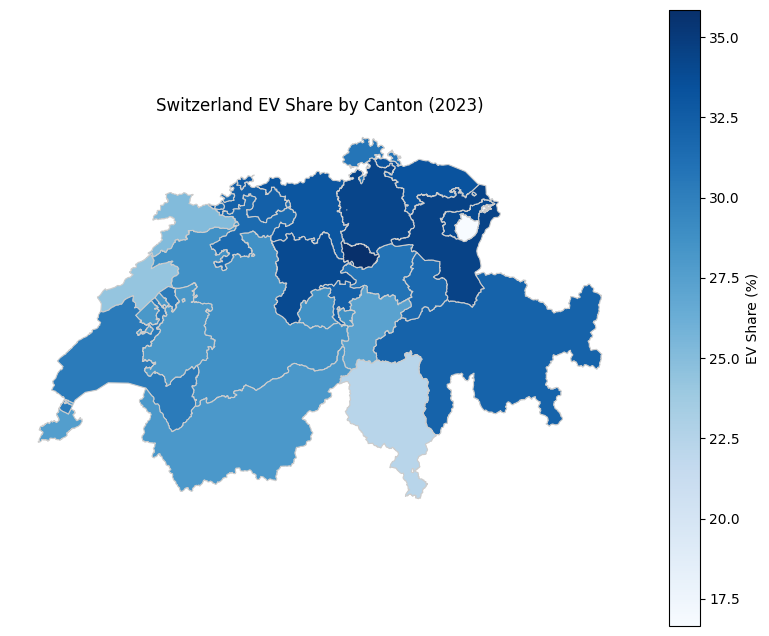

In [56]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf.plot(
    column='EV_share',
    cmap='Blues',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    legend_kwds={'label': "EV Share (%)"}
)
ax.set_title(f'Switzerland EV Share by Canton ({latest_year})')
ax.axis('off')
plt.show()

In [59]:
latest_year = EV_absolute['date'].max()
ev_abs_latest = EV_absolute[EV_absolute['date'] == latest_year].iloc[0]
ev_abs_dict = {col: int(ev_abs_latest[col]) for col in EV_absolute.columns if col != 'date'}
# Already done:
# gdf['abbr'] = gdf['kan_name'].map(canton_abbr)

gdf['EV_absolute'] = gdf['abbr'].map(ev_abs_dict)


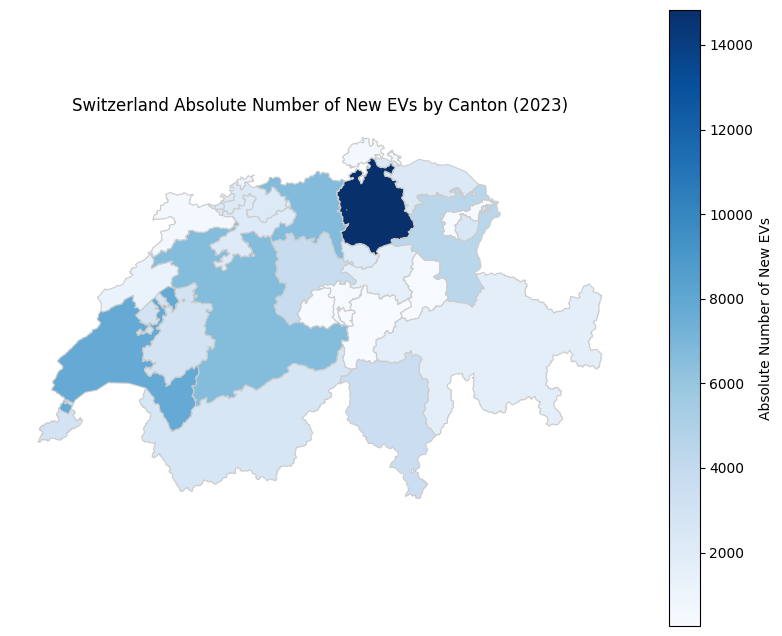

In [60]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf.plot(
    column='EV_absolute',
    cmap='Blues',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    legend_kwds={'label': "Absolute Number of New EVs"}
)
ax.set_title(f'Switzerland Absolute Number of New EVs by Canton ({latest_year})')
ax.axis('off')
plt.show()


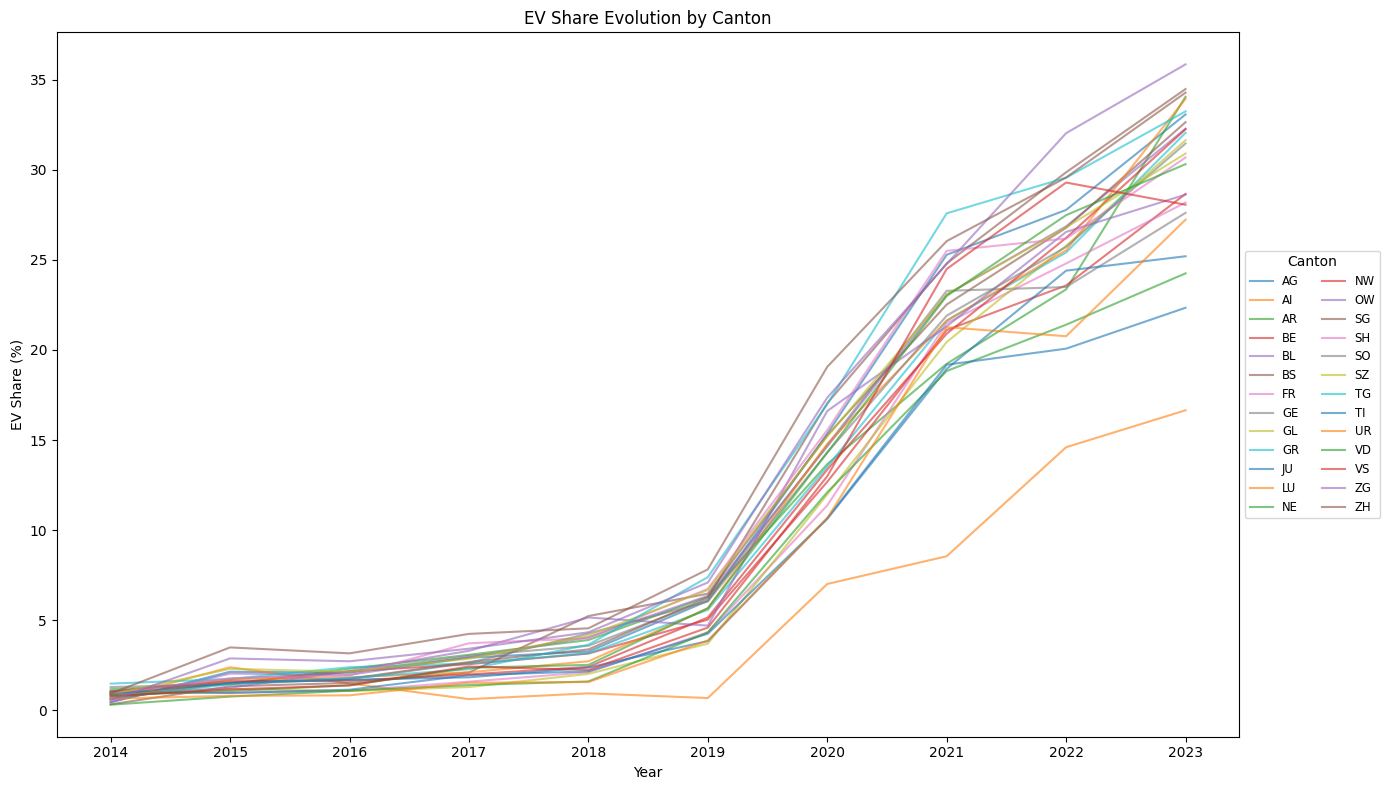

In [61]:
import matplotlib.pyplot as plt

# Melt EV_share to long format for plotting
ev_share_long = EV_share.melt(id_vars='date', var_name='canton', value_name='EV_share')

plt.figure(figsize=(14, 8))
for canton in sorted(ev_share_long['canton'].unique()):
    canton_data = ev_share_long[ev_share_long['canton'] == canton]
    plt.plot(canton_data['date'], canton_data['EV_share'], label=canton, alpha=0.6)

plt.title('EV Share Evolution by Canton')
plt.xlabel('Year')
plt.ylabel('EV Share (%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, fontsize='small', title="Canton")
plt.tight_layout()
plt.show()


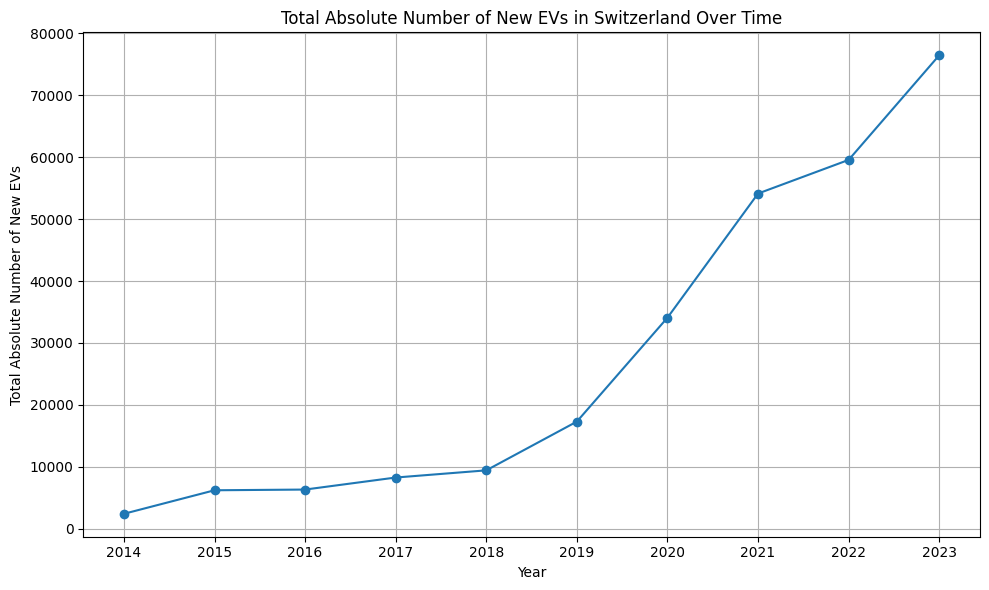

In [62]:
# Get the list of canton columns (exclude 'date')
canton_cols = [col for col in EV_absolute.columns if col != 'date']

# Compute the sum per year
EV_absolute['total_ev'] = EV_absolute[canton_cols].sum(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(EV_absolute['date'], EV_absolute['total_ev'], marker='o')
plt.title('Total Absolute Number of New EVs in Switzerland Over Time')
plt.xlabel('Year')
plt.ylabel('Total Absolute Number of New EVs')
plt.grid(True)
plt.tight_layout()
plt.show()


In [63]:
CO2_emissions = pd.read_csv('https://raw.githubusercontent.com/ChacoGolden/DSML_EV/refs/heads/main/CO2_carb_comb.csv')

In [64]:
CO2_emissions.head()

,Année,"Emissions liées aux carburants, en millions de tonnes de CO2","Emissions liées aux combustibles, en millions de tonnes de CO2",Emissions totale
0,1990,15.449183,23.408841,38.858024
1,1991,15.929118,23.250865,39.179983
2,1992,16.258574,23.848642,40.107216
3,1993,15.216857,22.655564,37.872420
4,1994,15.399493,22.930996,38.330490


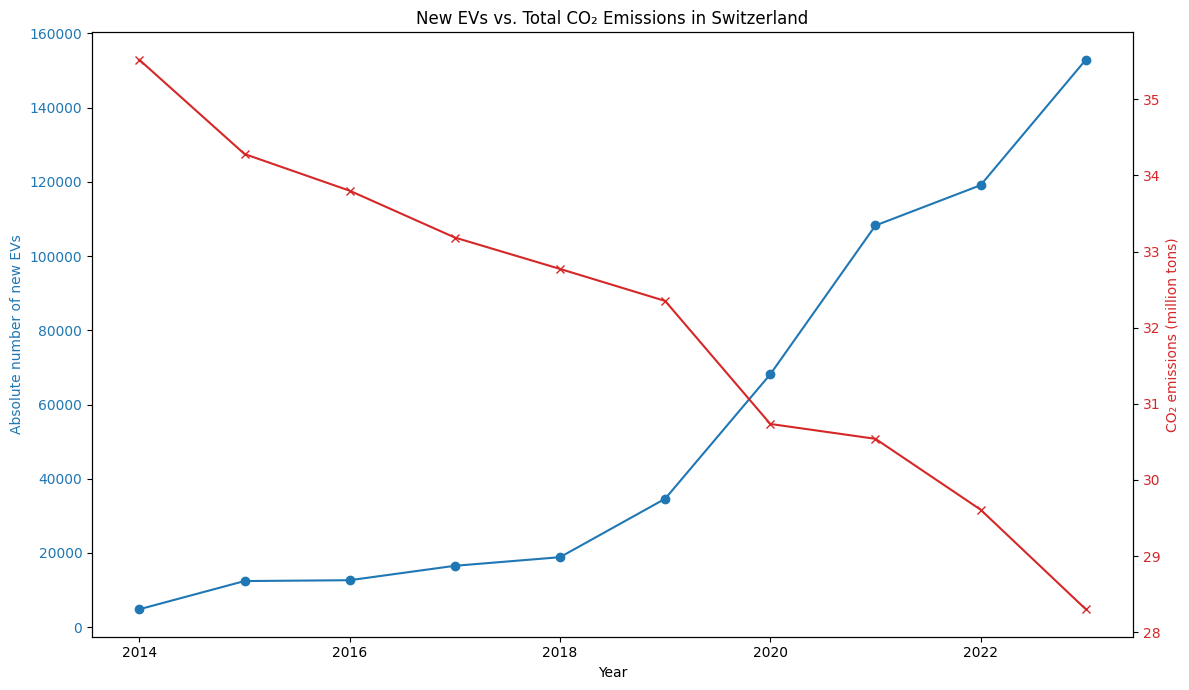

In [65]:
# Prepare EV absolute data
ev_years = EV_absolute['date'].astype(int)   # Ensure both are int for merge
ev_total = EV_absolute[[col for col in EV_absolute.columns if col != 'date']].sum(axis=1)

# Prepare CO2 emissions data
co2_years = CO2_emissions['Année'].astype(int)
co2_total = CO2_emissions['Emissions totale']

# Align years (intersection of years in both datasets)
years_common = sorted(set(ev_years) & set(co2_years))

ev_plot = ev_total[ev_years.isin(years_common)].reset_index(drop=True)
co2_plot = co2_total[co2_years.isin(years_common)].reset_index(drop=True)

# Plot
fig, ax1 = plt.subplots(figsize=(12, 7))

color1 = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Absolute number of new EVs', color=color1)
ax1.plot(years_common, ev_plot, color=color1, marker='o', label='EVs')
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('CO₂ emissions (million tons)', color=color2)
ax2.plot(years_common, co2_plot, color=color2, marker='x', label='CO₂ emissions')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title("New EVs vs. Total CO₂ Emissions in Switzerland")
fig.tight_layout()
plt.show()